In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from сustom_utils import display_tree
np.random.seed(0)

In [3]:
data = pd.read_csv('./csv/Admission_Predict.csv', index_col=0)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [4]:
data['Admitted'] = data['Chance of Admit'] >= 0.75
data = data.drop(['Chance of Admit'], axis=1)

In [5]:
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,True
2,324,107,4,4.0,4.5,8.87,1,True
3,316,104,3,3.0,3.5,8.00,1,False
4,322,110,3,3.5,2.5,8.67,1,True
5,314,103,2,2.0,3.0,8.21,0,False
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,True
397,325,107,3,3.0,3.5,9.11,1,True
398,330,116,4,5.0,4.5,9.45,1,True


In [6]:
features = data.drop(['Admitted'], axis=1)
labels = data['Admitted']

In [7]:
dt = DecisionTreeClassifier()
dt.fit(features, labels)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [8]:
dt.predict(features[0:5])

array([ True,  True, False,  True, False])

In [13]:
dt.score(features, labels)

1.0

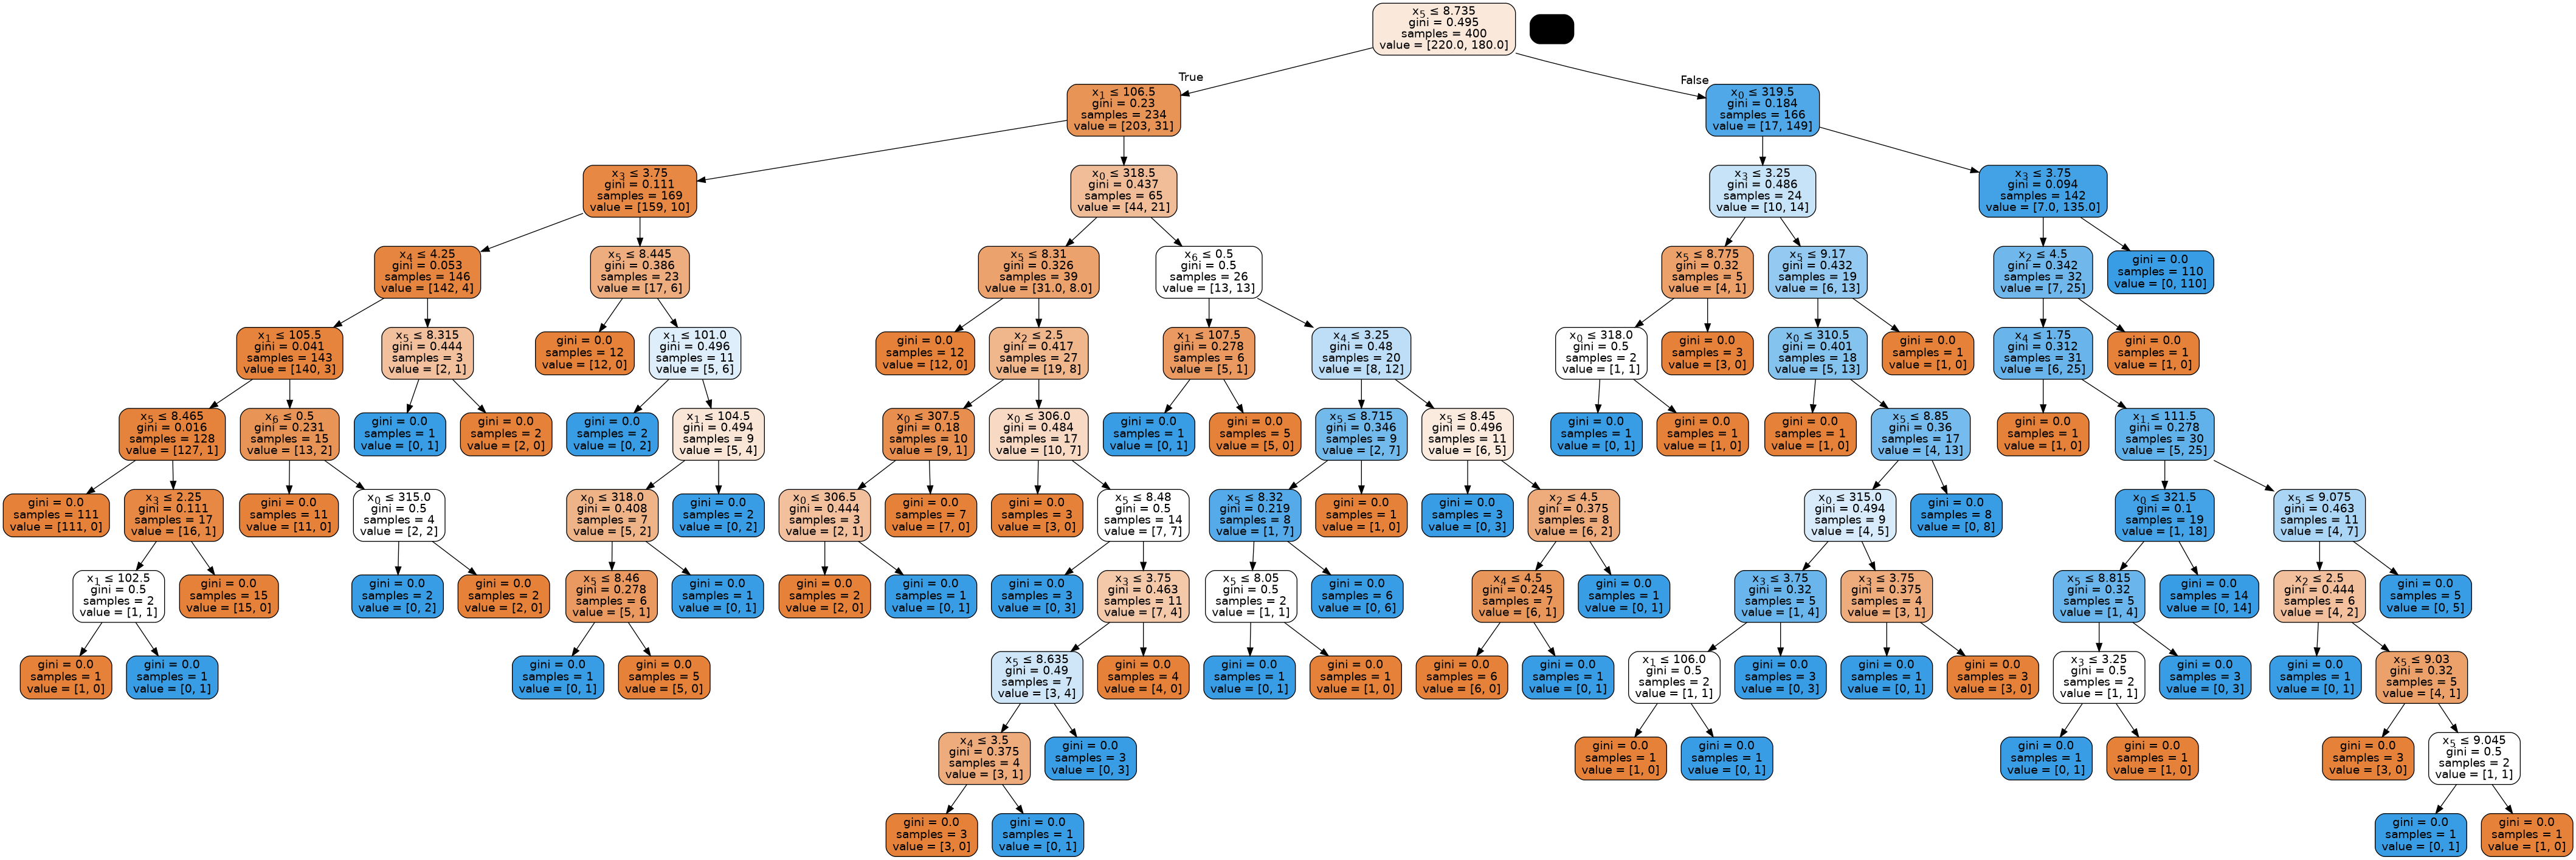

In [10]:
display_tree(dt)

In [11]:
dt_smaller = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)
dt_smaller.fit(features, labels)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,10
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
dt_smaller.score(features, labels)

0.885

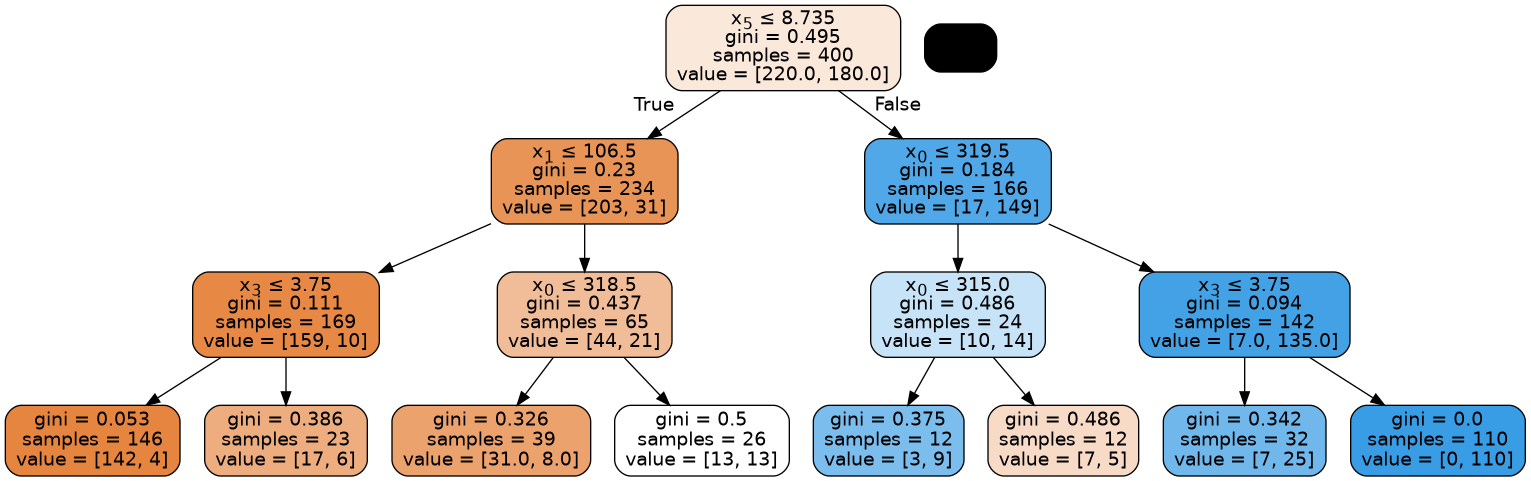

In [15]:
display_tree(dt_smaller)

In [38]:
dt_smaller.predict([[200,
                     110,
                     3,
                     1,
                     1,
                     8.8,
                     0]])

/home/jeny/PycharmProjects/nn2/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([ True])